# Notebook to demonstrate Zero shot and Few shot Learning

In [ ]:
import pandas as pd 
#%pip install langchain_groq
from langchain_groq.chat_models import ChatGroq
import pandas as pd
import numpy as np
from itertools import product
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score

In [ ]:
# Groq API and Models 
Groq_Token = open('..\\groqapi.txt', 'r').read()  # Do not share this key with anyone
groq_models = {"llama3-70b": "llama3-70b-8192", "mixtral": "mixtral-8x7b-32768", "gemma-7b": "gemma-7b-it","llama3.1-70b":"llama-3.1-70b-versatile","llama3-8b":"llama3-8b-8192","llama3.1-8b":"llama-3.1-8b-instant","gemma-9b":"gemma2-9b-it"}

**NOTE : DO NOT SHARE THE API KEY WITH ANYONE. DO NOT COMMIT THE API KEY TO GITHUB.**

Always do a sanity check before committing the code to github. If the key is found in the code, you will be penalized with a 0.5 marks deduction.

# Zero Shot 

In [ ]:
# Statement 
sentence = "The product quality is amazing but the delivery was delayed. However I am happy with the customer service."

# System Prompts 
query = f"""
* You are a sentiment analysis model. 
* Your task is to analyze the sentiment expressed in the given text and classify it as 'positive', 'negative', or 'neutral'. 
* Provide the sentiment label and, if necessary, a brief explanation of your reasoning.

Sentence: {sentence}
""" 

# To use Groq LLMs 
model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)

print(answer.content)

# Few Shot

In [ ]:
# Statement 
sentence = "The product quality is amazing but the delivery was delayed. However I am happy with the customer service."

# System Prompts 
query = f"""
* You are a sentiment analysis model. 
* Your task is to analyze the sentiment expressed in the given text and classify it as 'positive', 'negative', or 'neutral'. 
* Provide the sentiment label and, if necessary, a brief explanation of your reasoning.

Here are few examples:
1. Sentence: 'The customer service was excellent, and I received my order quickly.'
Sentiment: Positive

2. Sentence: 'The food was bland and the service was slow.'
Sentiment: Negative

3. Sentence: 'The product is okay, but it's not worth the price.'
Sentiment: Neutral

Sentence: {sentence}
""" 

# To use Groq LLMs 
model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)

print(answer.content)

In [ ]:
f = open("C:\\Users\\Rajeev Wankar\\Desktop\\Aarsh IITGN\\ES335 Machine Learning\\main\\ES335-MLAssignment1\\HAR\\UCI HAR Dataset\\features.txt", 'r').read().split('\n')

In [ ]:
feature_labels = pd.read_csv(r'../HAR/UCI HAR Dataset/features.txt',sep = '\\s+',header=None)
dataframeX = pd.read_csv(r'../HAR/UCI HAR Dataset/train/X_train.txt',sep = '\\s+',header=None)
dataframeY = pd.read_csv(r'../HAR/UCI HAR Dataset/train/y_train.txt',sep = '\\s+',header=None)
correlation_matrix = dataframeX.corr()

In [ ]:
def reduce_features(threshold = None):

    removals = set()
    pairs = product(range(len(correlation_matrix.columns)), repeat=2)

    for i, j in pairs:
        if i > j:
            correlation_value = correlation_matrix.iloc[i, j]
            if abs(correlation_value) > threshold and correlation_value != 1:
                if i not in removals and j not in removals:
                    removals.add(i)

    selected_features = [col for col in dataframeX.columns if col not in removals]
    return selected_features
    


    

In [ ]:
frs = reduce_features(threshold=0.9)

In [ ]:
feature_labels[1].to_dict()

In [ ]:
#features = np.array(feature_labels[1].iloc[frs])

def example(n):
    return dataframeX[frs].iloc[n, :].to_numpy()

activity_dic = {1: "WALKING", 2: "WALKING_UPSTAIRS", 3: "WALKING_DOWNSTAIRS", 4: "SITTING", 5: "STANDING", 6: "LAYING"}
def label(n):
    #print(dataframeY.iloc[n, 0])
    return (activity_dic[dataframeY.iloc[n, 0]])
    
label(10)
print(label(100))
print(label(234))
print(label(134))
print(label(135))

In [ ]:
print(len(features))
print(features)

In [ ]:
dictionary = {}
for i in range(len(dataframeX.columns)):
    dictionary[frs[i]] = features[i]

In [ ]:
dictionary

In [ ]:
act_labels = [label(i) for i in range(7352)]

In [ ]:
reduced_dataset = dataframeX[frs]
reduced_dataset=reduced_dataset.rename(columns=dictionary)

#display(reduced_dataset)
reduced_dataset.insert(0, "Activity_Name", act_labels)
#reduced_dataset["Activity_Name"] = act_labels
display(reduced_dataset)

In [ ]:
relevant_features = [
    'tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
    'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
    'tBodyAccJerk-mean()-X', 'tBodyAccJerk-mean()-Y', 'tBodyAccJerk-mean()-Z',
    'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z',
    'tBodyGyroJerk-mean()-X', 'tBodyGyroJerk-mean()-Y', 'tBodyGyroJerk-mean()-Z',
    'tBodyAccMag-mean()', 'tBodyAccMag-std()', 'tBodyGyroMag-mean()', 'tBodyGyroMag-std()',
    'tBodyAccJerkMag-mean()', 'tBodyAccJerkMag-std()', 'tBodyGyroJerkMag-mean()', 'tBodyGyroJerkMag-std()',
    'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
    'angle(tBodyGyroMean,gravityMean)', 'angle(tBodyGyroJerkMean,gravityMean)',
    'fBodyAcc-meanFreq()-X', 'fBodyAcc-meanFreq()-Y', 'fBodyAcc-meanFreq()-Z',
    'fBodyAccJerk-meanFreq()-X', 'fBodyAccJerk-meanFreq()-Y', 'fBodyAccJerk-meanFreq()-Z',
    'fBodyGyro-meanFreq()-X', 'fBodyGyro-meanFreq()-Y', 'fBodyGyro-meanFreq()-Z'
]

In [ ]:
real_relevants = []
for i in relevant_features:
    if i in features:
        real_relevants.append(i)
    


In [ ]:
neo_reduced_dataset=reduced_dataset[["Activity_Name"]+real_relevants[:20]]

In [ ]:
np.random.seed(42)
total_arr = np.random.choice(7352, 50, replace=False)
train_arr = total_arr[:30]
test_arr = total_arr[30:]

In [ ]:
train_dataset = neo_reduced_dataset.loc[train_arr].reset_index(drop=True)
test_dataset = neo_reduced_dataset.loc[test_arr].reset_index(drop=True).drop(columns="Activity_Name")
display(train_dataset)

In [ ]:
display(test_dataset)

In [ ]:
display(train_dataset)

In [ ]:
print(f"{train_dataset.to_csv()}")

In [ ]:
pd.options.display.max_rows = 9999

In [ ]:
# Statement 
sentence = "The product quality is amazing but the delivery was delayed. However I am happy with the customer service."
# System Prompts 
query = f"""
* You are a Human Activity Recognition model.
* Your task is to analyze the data given in the features provided and guess the activity being performed by the person.
* The activities are: WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING.
* The data features are: {list(train_dataset.columns)[1:]}
* Provide a Python list consisting of the activity label for every test sample.

Train data: (remember, there are {len(train_dataset)} training samples.)

{train_dataset.to_csv()}

Now, predict the activity label of the test data: (remember, there are {len(test_dataset)} test samples.)

Test data:

{test_dataset.to_csv()}
""" 

#To use Groq LLMs 
model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)
ans2 = llm.invoke(f"Extract the python list from this text and output it. Do not say anything else: {answer}")
print(answer.content)
print(ans2.content)

In [ ]:
print(f"{list(train_dataset.columns)[1:]}")

In [ ]:
print(train_dataset.to_csv(sep=" "))

In [ ]:
correct_arr = []
for i in range(len(test_arr)):
    correct_arr.append(label(test_arr[i]))
    #print(i, label(test_arr[i]))

In [ ]:
predicted_labels= ['WALKING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'STANDING', 'STANDING', 'WALKING_UPSTAIRS', 'STANDING', 'STANDING', 'LAYING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'STANDING', 'STANDING', 'WALKING', 'STANDING', 'STANDING', 'LAYING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS']

In [ ]:
print(len(predicted_labels))

In [ ]:
np.mean(np.array(predicted_labels)==np.array(correct_arr))

In [ ]:
label(135)

In [ ]:
import os
from groq import Groq

In [ ]:
client = Groq(
    api_key=Groq_Token,
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": f"""
                * You are a Human Activity Recognition model.
                * Your task is to analyze the data given in the features provided and guess the activity being performed by the person.
                * The activities are: WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING.
                * The features are: {features}
                * Provide the activity label and, if necessary, a brief explanation of your reasoning.
            """,
        },
        {
            "role": "user",
            "content": f"""
                        Which features do you think are relevant for differentiating between activities?
            """
        }
    ],
    model=groq_models["llama3.1-70b"],
    temperature=0
)

print(chat_completion.choices[0].message.content)

In [ ]:
client = Groq(
    api_key=Groq_Token,
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": f"""
                * You are a Human Activity Recognition model.
                * Your task is to analyze the data given in the features provided and guess the activity being performed by the person.
                * The activities are: WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING.
                * The features are: {features}
                * Provide the activity label and, if necessary, a brief explanation of your reasoning.
            """,
        },
        {
            "role": "user",
            "content": f"""
                        Which features do you think are relevant for differentiating between activities?
            """
        }
    ],
    model=groq_models["llama3.1-70b"],
    temperature=0
)

print(chat_completion.choices[0].message.content)

In [ ]:
model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(f"Extract the features from the text and output them as a single python array. Do not say anything else.:\n{chat_completion.choices[0].message.content}")
print(answer.content)

In [ ]:
relevant_features = [
    "tBodyAcc-mean()-X", "tBodyAcc-mean()-Y", "tBodyAcc-mean()-Z",
    "tBodyAcc-std()-X", "tBodyAcc-std()-Y", "tBodyAcc-std()-Z",
    "tBodyAccJerk-mean()-X", "tBodyAccJerk-mean()-Y", "tBodyAccJerk-mean()-Z",
    "tBodyGyro-mean()-X", "tBodyGyro-mean()-Y", "tBodyGyro-mean()-Z",
    "fBodyAcc-meanFreq()-X", "fBodyAcc-meanFreq()-Y", "fBodyAcc-meanFreq()-Z",
    "tBodyAcc-energy()-X", "tBodyAcc-energy()-Y", "tBodyAcc-energy()-Z",
    "tBodyAcc-correlation()-X,Y", "tBodyAcc-correlation()-X,Z", "tBodyAcc-correlation()-Y,Z"
]

In [ ]:
dictionary = feature_labels[1].to_dict()

In [ ]:
d = feature_labels[1].to_list()

In [ ]:
new_frame=dataframeX.rename(columns=dictionary)

In [ ]:
new_frame = new_frame[relevant_features]

In [ ]:
new_frame.insert(0, "Activity_Name", act_labels)

In [ ]:
display(new_frame.head())

In [ ]:
for feature in relevant_features:
    if feature not in d:
        print(f"{feature} is not in the features list.")

In [ ]:
np.random.seed(42)
total_arr = np.random.choice(7352, 50, replace=False)
train_arr = total_arr[:40]
test_arr = total_arr[40:]

In [ ]:
def roundify(df):
    for col in df.columns:
        df[col] = df[col].round(2)
    return df

In [ ]:
train_dataset = roundify(new_frame.loc[train_arr].reset_index(drop=True))
test_dataset = roundify(new_frame.loc[test_arr].reset_index(drop=True).drop(columns="Activity_Name"))
display(train_dataset)

In [ ]:
test_dataset.columns

In [ ]:
# Statement 
sentence = "The product quality is amazing but the delivery was delayed. However I am happy with the customer service."
# System Prompts 
query = f"""
* You are a Human Activity Recognition model.
* Your task is to analyze the data given in the features provided and guess the activity being performed by the person.
* DO NOT use any machine learning models.
* The activities are: WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING.
* The data features are: {list(train_dataset.columns)[1:]}
* Provide a Python list consisting of the activity label for every test sample.

Train data: (remember, there are {len(train_dataset)} training samples.)

{train_dataset.to_csv(sep=" ")}

Now, predict the activity label of the test data: (remember, there are {len(test_dataset)} test samples.)

Test data:
{test_dataset.to_csv(sep=" ")}
""" 

#To use Groq LLMs 
model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)
ans2 = llm.invoke(f"Extract the python list from this text and output it. Do not say anything else: {answer}")
print(answer.content)
print(ans2.content)

In [ ]:
predicted_labels = ['LAYING', 'WALKING', 'WALKING_UPSTAIRS', 'LAYING', 'WALKING_DOWNSTAIRS', 'LAYING', 'LAYING', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS']

In [ ]:
correct_arr = []
for i in range(len(test_arr)):
    correct_arr.append(label(test_arr[i]))
    #print(i, label(test_arr[i]))

In [ ]:
(np.array(predicted_labels)==np.array(correct_arr)).mean()

In [ ]:
client = Groq(
    api_key=Groq_Token,
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": f"""
                * You are a Human Activity Recognition model.
                * Your task is to analyze the data given in the features provided and guess the activity being performed by the person.
                * The activities are: WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING.
                * The features are: {features}
                * Provide the activity label and, if necessary, a brief explanation of your reasoning.
            """,
        },
        {
            "role": "user",
            "content": f"""
                        Which features do you think are relevant for differentiating between activities?
            """
        }
    ],
    model=groq_models["llama3.1-70b"],
    temperature=0
)

print(chat_completion.choices[0].message.content)

In [ ]:
client = Groq(
    api_key=Groq_Token,
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": f"""
                * You are a Human Activity Recognition model.
                * Your task is to analyze the data given in the features provided and guess the activity being performed by the person.
                * The activities are: WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING.
                * The features are: {features}
                * Provide the activity label and, if necessary, a brief explanation of your reasoning.
            """,
        },
        {
            "role": "user",
            "content": f"""
                        Which features do you think are relevant for differentiating between activities? Provide the output as a single copyable python array.
            """
        }
    ],
    model=groq_models["llama3.1-70b"],
    temperature=0
)

print(chat_completion.choices[0].message.content)

In [ ]:
client = Groq(
    api_key=Groq_Token,
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": f"""
                * You are a Human Activity Recognition model.
                * Your task is to analyze the data given in the features provided and guess the activity being performed by the person.
                * The activities are: WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING.
                * The features are: {features}
                * Provide the activity label and, if necessary, a brief explanation of your reasoning.
            """,
        },
        {
            "role": "user",
            "content": f"""
                        Look at these examples for reference:
                        Example 1: 
                        
                        Feature Data: {" ".join(map(str, example()))}
                        Activity Label: {label(489)}

                        Example 2:
                        Feature Data: {" ".join(map(str, example(100)))}
                        Activity Label: {label(100)}

                        Example 3:
                        Feature Data: {" ".join(map(str, example(345)))}
                        Activity Label: {label(345)}
                        
                        Now, predict this:
                        Feature Data: {" ".join(map(str, example(706)))}
            """
        }
    ],
    #model=groq_models["llama3-70b"],
    model = "llama-3.1-70b-versatile",
    temperature=0
)

print(chat_completion.choices[0].message.content)

In [26]:
act_dic = {"WALKING":[], "WALKING_UPSTAIRS": [], "WALKING_DOWNSTAIRS": [], "SITTING": [], "STANDING": [], "LAYING": []}

In [27]:
for i in range(len(dataframeY[0].to_numpy())):
    act_dic[label(i)].append(i)

In [28]:
act_dic.keys()

dict_keys(['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'])

In [ ]:
print(f"""
                * You are a Human Activity Recognition model.
                * Your task is to analyze the data given in the features provided and guess the activity being performed by the person.
                * The activities are: WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING.
                * The training dataset is: {train_dataset}
                * Provide the activity label and, if necessary, a brief explanation of your reasoning.
            """)

In [ ]:
# Statement 
sentence = "The product quality is amazing but the delivery was delayed. However I am happy with the customer service."
# System Prompts 
query = f"""
* You are a Human Activity Recognition model.
* Your task is to analyze the data given in the features provided and guess the activity being performed by the person.
* DO NOT use any machine learning models.
* The activities are: WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING.
* The data features are: {list(train_dataset.columns)[1:]}
* Provide a Python list consisting of the activity label for every test sample.

Here is the training data:
Activity label: WALKING:
{training_frames[0]} 



Now, predict the activity label of the test data: (remember, there are {len(test_dataset)} test samples.)

Test data:
{test_dataset.to_csv(sep=" ")}
""" 

#To use Groq LLMs 
model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)
ans2 = llm.invoke(f"Extract the python list from this text and output it. Do not say anything else: {answer}")
print(answer.content)
print(ans2.content)

In [220]:
all_frames = [new_frame[new_frame["Activity_Name"]==i].sample(n=2, random_state=42).reset_index(drop=True) for i in act_dic.keys()]
#walking_frame_train = walking_frame.loc[:10].reset_index(drop=True)
#display(walking_frame_train)

In [156]:
display(new_frame.head())

,Activity_Name,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,...,tBodyGyro-mean()-Z,fBodyAcc-meanFreq()-X,fBodyAcc-meanFreq()-Y,fBodyAcc-meanFreq()-Z,tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z"
0,STANDING,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,0.077996,0.005001,-0.067831,...,0.107725,0.252483,0.131836,-0.052050,-0.999945,-0.999863,-0.994612,0.376314,0.435129,0.660790
1,STANDING,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,0.074007,0.005771,0.029377,...,0.100584,0.271309,0.042864,-0.014310,-0.999991,-0.999788,-0.998405,-0.013429,-0.072692,0.579382
2,STANDING,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,0.073636,0.003104,-0.009046,...,0.096127,0.124531,-0.064611,0.082677,-0.999969,-0.999660,-0.999470,-0.124698,-0.181105,0.608900
3,STANDING,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,0.077321,0.020058,-0.009865,...,0.085538,0.029044,0.080302,0.185695,-0.999976,-0.999736,-0.999504,-0.305693,-0.362654,0.507459
4,STANDING,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,0.073444,0.019122,0.016780,...,0.077392,0.181090,0.057988,0.559786,-0.999991,-0.999856,-0.999757,-0.155804,-0.189763,0.599213


In [130]:
act_dic.keys()

dict_keys(['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'])

In [221]:
training_frames = [frame.loc[:1].reset_index(drop=True) for frame in all_frames]
test_frames = [frame.loc[1:].reset_index(drop=True) for frame in all_frames]

In [222]:
test_frame_data = pd.concat(test_frames).reset_index(drop=True)
# Shuffle test_frame_data and remove the activity labels
test_frame_data = roundify(test_frame_data.sample(frac=1, random_state=13).reset_index(drop=True))
test_data = test_frame_data.drop(columns="Activity_Name")
#test_frame_data = test_frame_data.drop(columns="Activity_Name")
display(test_frame_data)

,Activity_Name,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,...,tBodyGyro-mean()-Z,fBodyAcc-meanFreq()-X,fBodyAcc-meanFreq()-Y,fBodyAcc-meanFreq()-Z,tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z"
0,WALKING_UPSTAIRS,0.29,-0.01,-0.19,-0.46,-0.38,-0.34,0.05,-0.07,0.32,...,0.07,-0.85,-0.52,-0.27,-0.85,-0.92,-0.79,-0.07,-0.45,-0.31
1,SITTING,0.32,0.02,-0.18,-0.96,-0.59,-0.85,0.05,-0.20,0.07,...,-0.29,0.12,-0.10,-0.20,-1.00,-0.96,-0.98,0.38,-0.73,-0.74
2,STANDING,0.28,-0.01,-0.10,-1.00,-0.99,-0.99,0.07,0.01,0.00,...,0.09,0.07,0.22,0.43,-1.00,-1.00,-1.00,0.01,-0.14,0.27
3,LAYING,0.23,-0.02,-0.11,-0.94,-0.91,-0.98,0.12,0.04,0.00,...,0.11,-0.38,-0.30,0.38,-1.00,-1.00,-1.00,0.60,-0.14,-0.33
4,WALKING,0.21,-0.04,-0.10,-0.32,-0.03,-0.24,0.40,-0.08,0.34,...,0.13,-0.07,-0.12,0.39,-0.77,-0.82,-0.74,-0.39,-0.23,0.49
5,WALKING_DOWNSTAIRS,0.36,-0.02,-0.14,0.40,-0.12,-0.01,-0.15,-0.28,0.19,...,0.01,-0.51,0.07,0.01,-0.02,-0.85,-0.56,0.24,-0.65,-0.28


In [137]:
import ast

In [169]:
# Statement 
sentence = "The product quality is amazing but the delivery was delayed. However I am happy with the customer service."
# System Prompts 
query = f"""
* You are a Human Activity Recognition model.
* Your task is to analyze the data given in the features provided and guess the activity being performed by the person.
* DO NOT use any machine learning models.
* The activities are: WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING.
* Provide a Python list consisting of the activity label for every test sample.

Here is the training data:
Activity label: WALKING:
{roundify(training_frames[0]).to_csv(sep=" ")}

Activity label: WALKING_UPSTAIRS:
{roundify(training_frames[1]).to_csv(sep=" ")}

Activity label: WALKING_DOWNSTAIRS:
{roundify(training_frames[2]).to_csv(sep=" ")}

Activity label: SITTING:
{roundify(training_frames[3]).to_csv(sep=" ")}

Activity label: STANDING:
{roundify(training_frames[4]).to_csv(sep=" ")}

Activity label: LAYING:
{roundify(training_frames[5]).to_csv(sep=" ")}


Now, predict the activity label of the test data: (remember, there are {len(test_frame_data)} test samples.)
DO NOT output the python code. Just provide your predictions as a python list.
Test data:
{test_data.to_csv(sep=" ")}
""" 

#To use Groq LLMs 
model_name = "llama3.1-70b" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)
#ans2 = llm.invoke(f"Extract the python list from this text and output it. Do not say anything else: {answer}")
print(answer.content)
predicted_labels = ast.literal_eval(answer.content)
actual_labels = test_frame_data["Activity_Name"].to_list()
print((np.array(actual_labels)==np.array(predicted_labels)).mean())
#print(ans2.content)

['WALKING_DOWNSTAIRS', 'LAYING', 'WALKING_DOWNSTAIRS', 'LAYING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'LAYING', 'LAYING', 'WALKING', 'WALKING', 'WALKING_UPSTAIRS']
0.5


In [134]:
predicted_labels = ['LAYING', 'LAYING', 'WALKING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING']


In [ ]:
* The data features are: {list(train_dataset.columns)[1:]}

In [135]:

print(len(actual_labels))

12


In [136]:
(np.array(actual_labels)==np.array(predicted_labels)).mean()

0.4166666666666667

In [214]:
import time

In [229]:
# Statement 
def predict(testdf):
    # System Prompts 
    query = f"""
    * You are a Human Activity Recognition model.
    * Your task is to analyze the data given in the features provided and guess the activity being performed by the person.
    * DO NOT use any machine learning models.
    * The activities are: WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING.
    * Provide a Python list consisting of the activity label for every test sample.

    Here is the training data:
    Activity label: WALKING:
    {roundify(training_frames[0]).to_csv(sep=" ")}

    Activity label: WALKING_UPSTAIRS:
    {roundify(training_frames[1]).to_csv(sep=" ")}

    Activity label: WALKING_DOWNSTAIRS:
    {roundify(training_frames[2]).to_csv(sep=" ")}

    Activity label: SITTING:
    {roundify(training_frames[3]).to_csv(sep=" ")}

    Activity label: STANDING:
    {roundify(training_frames[4]).to_csv(sep=" ")}

    Activity label: LAYING:
    {roundify(training_frames[5]).to_csv(sep=" ")}


    Now, predict the activity label of the test data: (remember, there are {len(testdf)} test samples.)
    DO NOT output the python code. Just provide your predictions as a python list.
    Test data:
    {testdf.to_csv(sep=" ")}
    """ 

    #To use Groq LLMs 
    model_name = "llama3.1-70b" # We can choose any model from the groq_models dictionary
    llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
    answer = llm.invoke(query)
    #ans2 = llm.invoke(f"Extract the python list from this text and output it. Do not say anything else: {answer}")
    #print(answer.content)
    predicted_labels = ast.literal_eval(answer.content)
    time.sleep(1)
    return predicted_labels
    #print((np.array(actual_labels)==np.array(predicted_labels)).mean())
    #print(ans2.content)

In [ ]:
accarr = []

In [233]:
accarr

[0.8333333333333334,
 0.8333333333333334,
 0.75,
 0.8333333333333334,
 0.6666666666666666,
 0.3333333333333333,
 0.5833333333333334,
 0.5833333333333334,
 0.4166666666666667]

In [230]:
#accarr = []
for i in range(10, 20):
    print(i)
    predictions = []
    all_frames = [new_frame[new_frame["Activity_Name"]==act].sample(n=i+2, random_state=42).reset_index(drop=True) for act in act_dic.keys()]
    training_frames = [frame.loc[:i].reset_index(drop=True) for frame in all_frames]
    test_frames = [frame.loc[i:].reset_index(drop=True) for frame in all_frames]
    test_frame_data = pd.concat(test_frames).reset_index(drop=True)
    test_data = test_frame_data.drop(columns="Activity_Name")
    actual_labels = test_frame_data["Activity_Name"].to_list()
    for j in range(len(test_data)):
        prediction = predict(test_data.loc[[j]])[0]
        print(f"Prediction {j}: {prediction}")
        predictions.append(prediction)
    accuracy = (np.array(actual_labels)==np.array(predictions)).mean()
    print(accuracy)
    print("====================")
    accarr.append(accuracy)

1
Prediction 0: WALKING
Prediction 1: WALKING
Prediction 2: WALKING_UPSTAIRS
Prediction 3: WALKING
Prediction 4: WALKING_DOWNSTAIRS
Prediction 5: WALKING_DOWNSTAIRS
Prediction 6: SITTING
Prediction 7: STANDING
Prediction 8: STANDING
Prediction 9: STANDING
Prediction 10: LAYING
Prediction 11: LAYING
0.8333333333333334
2
Prediction 0: WALKING
Prediction 1: WALKING
Prediction 2: WALKING_UPSTAIRS
Prediction 3: WALKING_UPSTAIRS
Prediction 4: WALKING_DOWNSTAIRS
Prediction 5: WALKING_DOWNSTAIRS
Prediction 6: SITTING
Prediction 7: STANDING
Prediction 8: STANDING
Prediction 9: STANDING
Prediction 10: LAYING
Prediction 11: WALKING
0.8333333333333334
3
Prediction 0: WALKING
Prediction 1: WALKING
Prediction 2: WALKING_DOWNSTAIRS
Prediction 3: WALKING
Prediction 4: WALKING_DOWNSTAIRS
Prediction 5: WALKING_DOWNSTAIRS
Prediction 6: SITTING
Prediction 7: SITTING
Prediction 8: STANDING
Prediction 9: STANDING
Prediction 10: LAYING
Prediction 11: SITTING
0.75
4
Prediction 0: WALKING
Prediction 1: WALKING

In [234]:
#accarr = []
for i in range(10, 20):
    print(i)
    predictions = []
    all_frames = [new_frame[new_frame["Activity_Name"]==act].sample(n=i+2, random_state=42).reset_index(drop=True) for act in act_dic.keys()]
    training_frames = [frame.loc[:i].reset_index(drop=True) for frame in all_frames]
    test_frames = [frame.loc[i:].reset_index(drop=True) for frame in all_frames]
    test_frame_data = pd.concat(test_frames).reset_index(drop=True)
    test_data = test_frame_data.drop(columns="Activity_Name")
    actual_labels = test_frame_data["Activity_Name"].to_list()
    for j in range(len(test_data)):
        prediction = predict(test_data.loc[[j]])[0]
        print(f"Prediction {j}: {prediction}")
        predictions.append(prediction)
    accuracy = (np.array(actual_labels)==np.array(predictions)).mean()
    print(accuracy)
    print("====================")
    accarr.append(accuracy)

10
Prediction 0: WALKING
Prediction 1: WALKING
Prediction 2: WALKING_UPSTAIRS
Prediction 3: WALKING
Prediction 4: WALKING_DOWNSTAIRS
Prediction 5: WALKING_UPSTAIRS
Prediction 6: SITTING
Prediction 7: SITTING
Prediction 8: WALKING
Prediction 9: LAYING
Prediction 10: WALKING
Prediction 11: STANDING
0.5
11
Prediction 0: WALKING
Prediction 1: WALKING_DOWNSTAIRS


RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama-3.1-70b-versatile` in organization `org_01j57vym4qfngrwhcawhdpybvr` on : Limit 1000000, Used 1000336, Requested 3404. Please try again in 5m23.1508s. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': '', 'code': 'rate_limit_exceeded'}}

In [225]:
for i in range(len(test_data)):
    predictions.append((predict(test_data.loc[[i]]))[0])
    

['WALKING_UPSTAIRS']
['SITTING']
['STANDING']
['LAYING']
['WALKING']
['WALKING_DOWNSTAIRS']


In [238]:
accarr

[0.8333333333333334,
 0.8333333333333334,
 0.75,
 0.8333333333333334,
 0.6666666666666666,
 0.3333333333333333,
 0.5833333333333334,
 0.5833333333333334,
 0.4166666666666667,
 0.5]

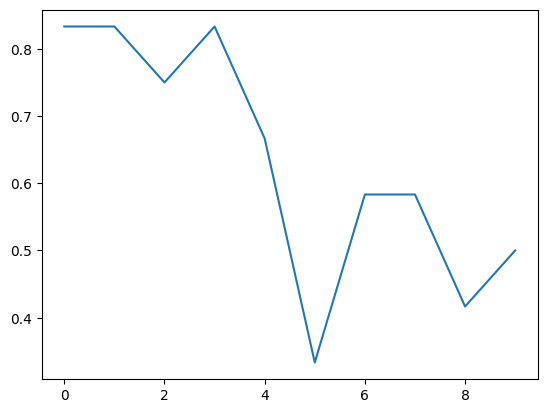

In [236]:
import matplotlib.pyplot as plt
plt.plot(accarr)

In [201]:
a = predict(test_data.loc[[10]])

['WALKING']


In [226]:
actual_labels = test_frame_data["Activity_Name"].to_list()

In [227]:
(np.array(predictions)==np.array(actual_labels)).mean()

1.0

In [202]:
actual_labels[10]

'WALKING'